In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("Fare", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [6]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,S,0,1
1,2,1,1,38.0,1,0,C,1,0
2,3,1,3,26.0,0,0,S,1,0
3,4,1,1,35.0,1,0,S,1,0
4,5,0,3,35.0,0,0,S,0,1


Now, we do the same to the "Embarked" column.

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


In [9]:
# Get the number of Null values for each column
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [10]:
# Impute missing age values using the average age and round the values to the nearest integer

titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Age"] = titanic_df["Age"].round().astype(int)
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,0,1,0,0,1
1,2,1,1,38,1,0,1,0,1,0,0
2,3,1,3,26,0,0,1,0,0,0,1
3,4,1,1,35,1,0,1,0,0,0,1
4,5,0,3,35,0,0,0,1,0,0,1


In [12]:
# Split the data into dependent and independent variables
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female' ,'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

# Split original dataset into training and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set further into training and development set
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

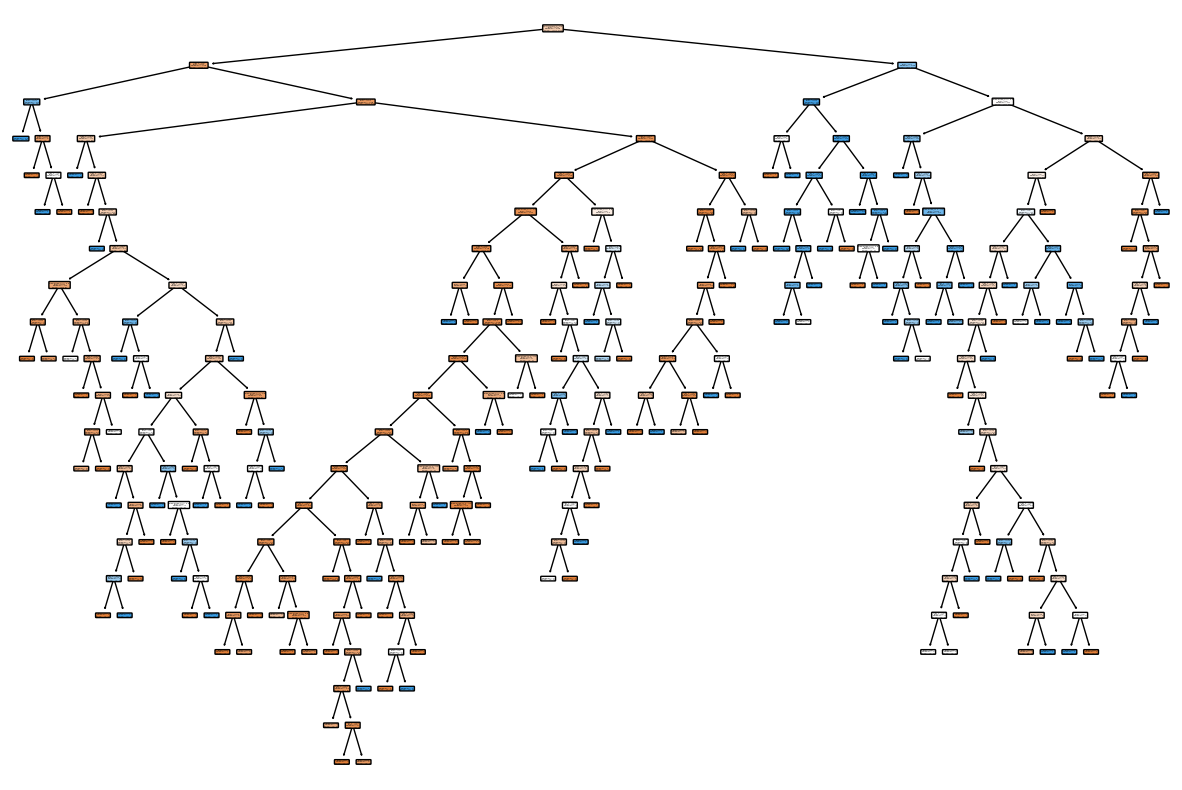

In [13]:
# Training model
tree_model = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_model.fit(X_train, y_train)

fig = plt.figure(figsize=(15,10))
plot_tree(tree_model, feature_names=list(X.columns), rounded = True, proportion = False, precision = 2, filled = True)
plt.show

In [14]:
# Model accuracy
print("Model accuracy:", tree_model.score(X_dev, y_dev))
print("At depth:", tree_model.tree_.max_depth)

Model accuracy: 0.7762237762237763
At depth: 20


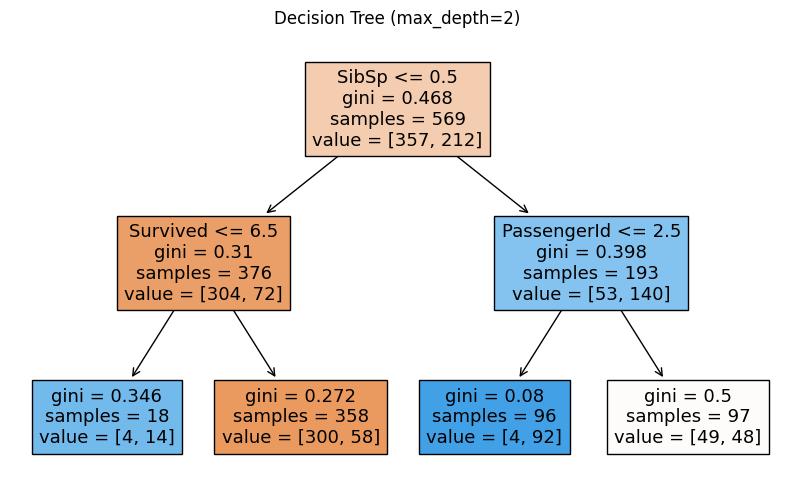

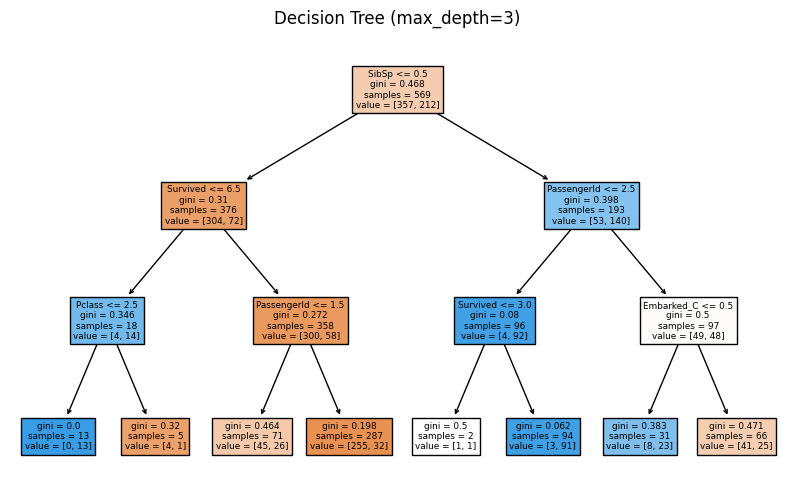

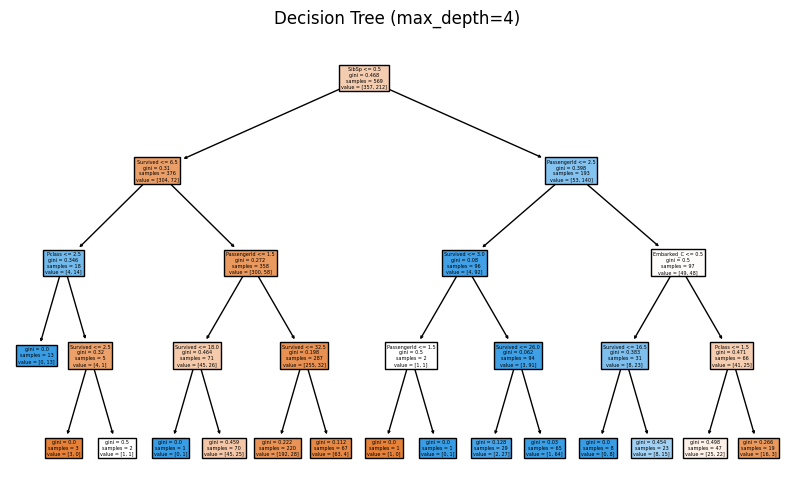

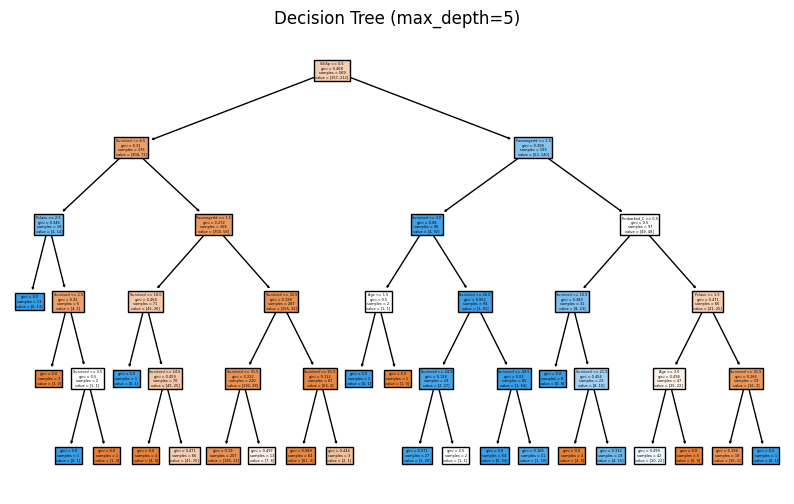

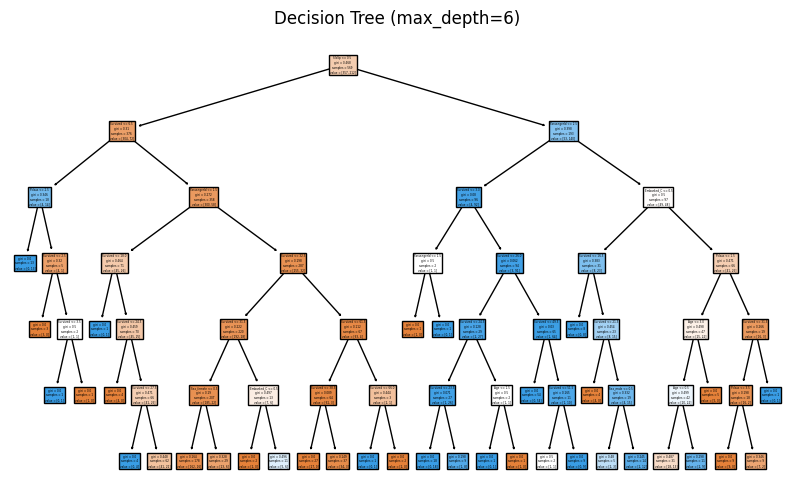

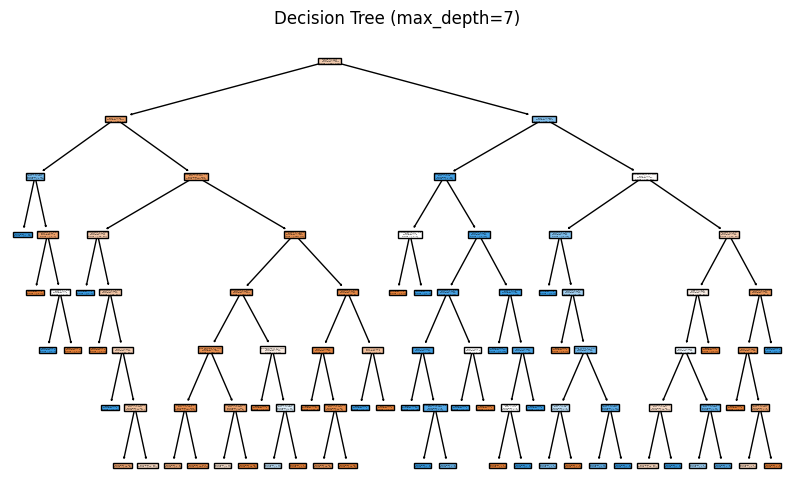

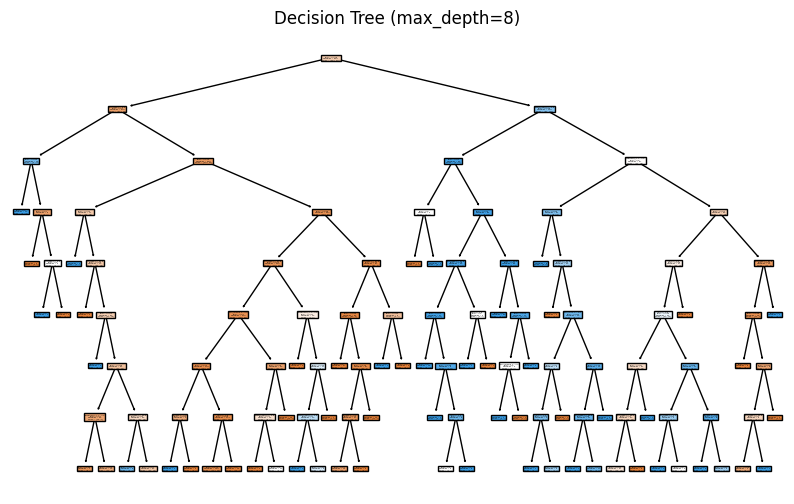

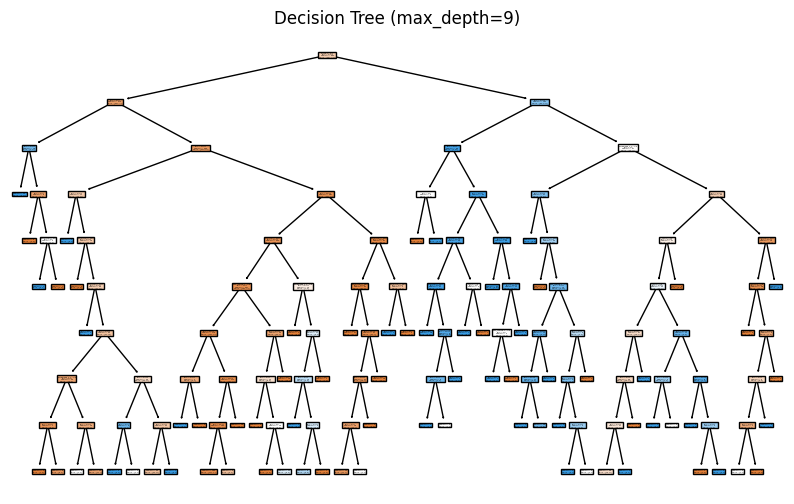

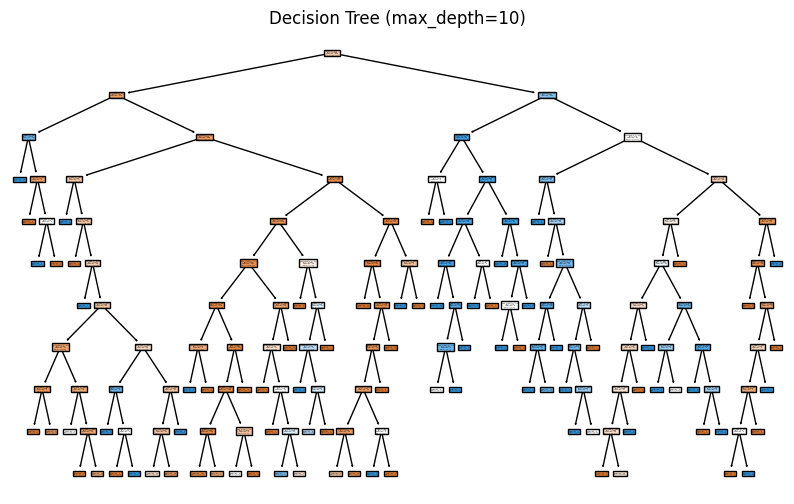

In [15]:
# Determine the optimal max depth
max_depths = range(2, 11)
training_accuracies = []
development_accuracies = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    training_accuracies.append(tree.score(X_train, y_train))
    development_accuracies.append(tree.score(X_dev, y_dev))
    
    plt.figure(figsize=(10, 6))
    plot_tree(tree, filled=True, feature_names=list(titanic_df.columns))
    plt.title(f"Decision Tree (max_depth={depth})")
    plt.show()

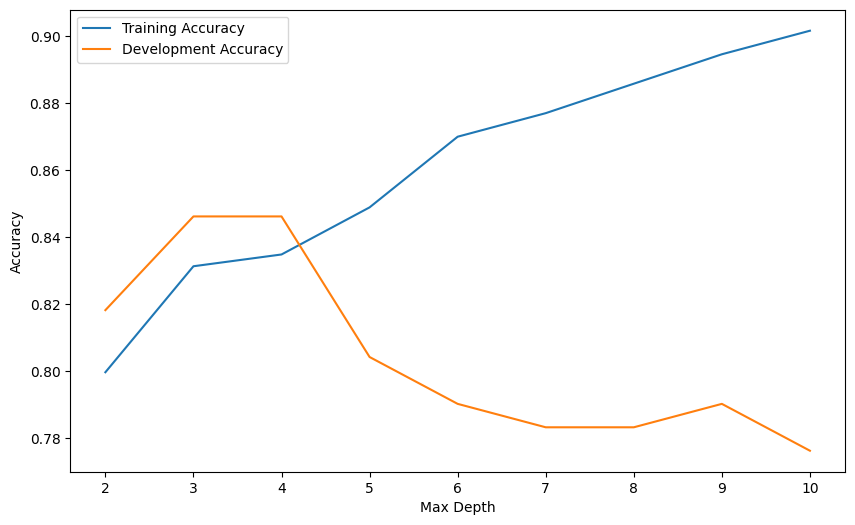

In [16]:
# Plot the training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_accuracies, label="Training Accuracy")
plt.plot(max_depths, development_accuracies, label="Development Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()   

## Intrepretation of the accuracies

The lines illustrate the model's performance at different depths of the decision tree. The x-axis is the depth of the decision tree, and the y-axis is the accuracy of the model.

The training accuracy line shows how well the model performs on the training set as the depth of the tree increases. As the depth increases, the model becomes more complex and can better capture the patterns in the training data, indicating that the model is learning and capturing the patterns present in the training data.

The development accuracy line represents how well the model generalises to new, unseen data that is not part of the training set. Initially, as the depth of the tree increases, the development accuracy also increases. However, after a certain depth, the development accuracy starts to decrease. This indicates that the model is overfitting to the training data and is becoming less effective at generalising new data.

Increasing depth improves both training and development accuracy, but after a certain point, the model starts to overfit, and the development accuracy begins to drop as the model becomes less effective at generalising to new, unseen data. This observation suggests that a balance needs to be struck in terms of the depth of the decision tree to achieve good generalisation performance on new data.

In [17]:
# Fit the final decision tree model with optimal max depth
final_max_depth = max_depths[development_accuracies.index(max(development_accuracies))]
final_tree = DecisionTreeClassifier(max_depth=final_max_depth, random_state=42)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
# Evaluate the model on the test set
accuracy_test = final_tree.score(X_test, y_test)

# Print the accuracy on the test set
print(f"Accuracy on test set: {accuracy_test}")

Accuracy on test set: 0.7988826815642458


# Task 3- Random Forests

In [37]:
# Import libraries

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

<function matplotlib.pyplot.show(close=None, block=None)>

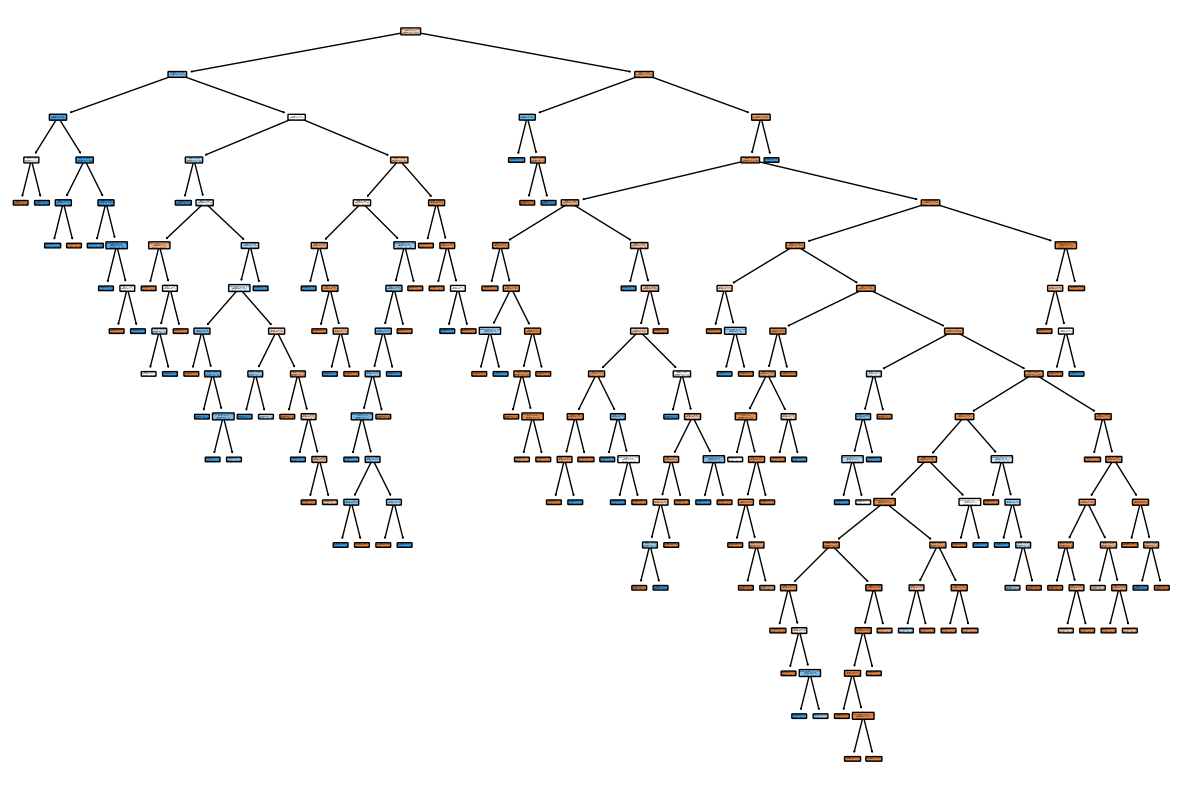

In [20]:
# Bagged tree model
bagged_tree = BaggingClassifier(random_state=42)
bagged_tree.fit(X_train_full, y_train_full)

# Extract the first decision tree from a bagged ensemble of decision trees
base_tree = bagged_tree.estimators_[0]

fig = plt.figure(figsize=(15,10))
plot_tree(base_tree, feature_names=list(X.columns), rounded = True, proportion = False, precision = 2, filled = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

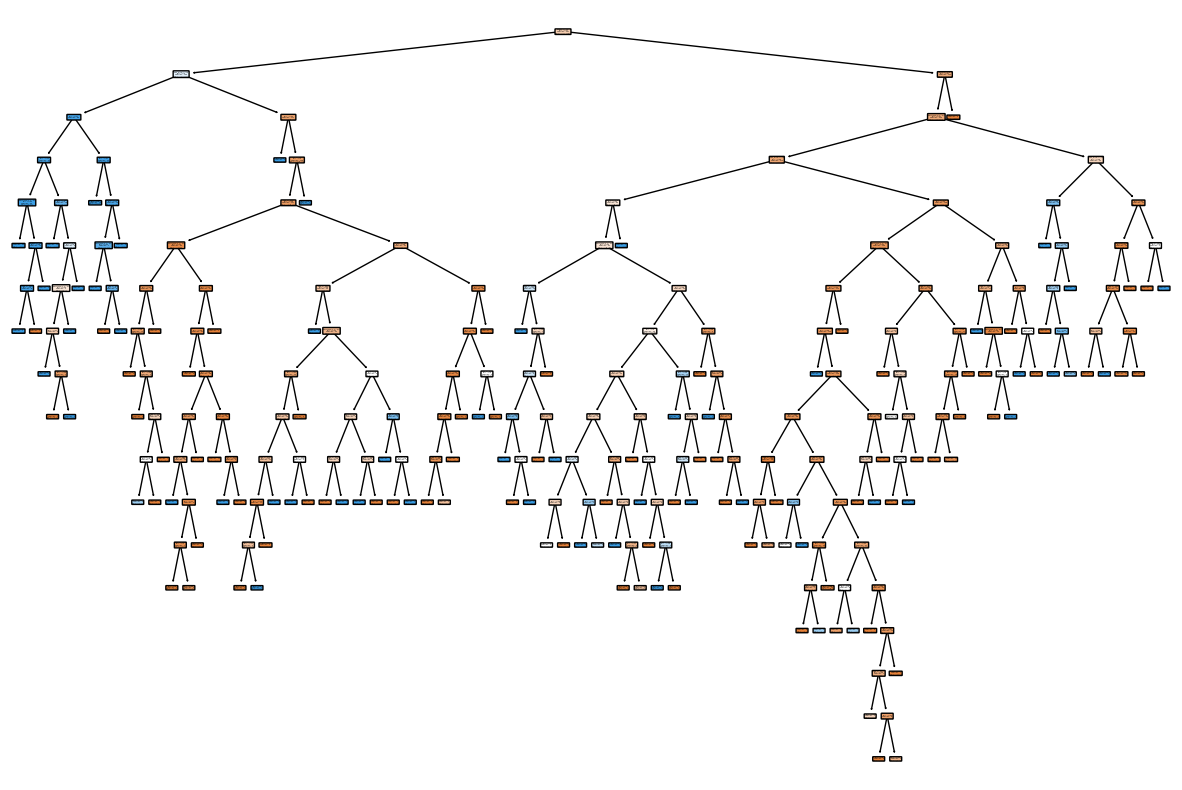

In [28]:
# Random forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_full, y_train_full)

# Extract the first decision tree from the random forest
base_tree = random_forest.estimators_[0]

fig = plt.figure(figsize=(15,10))
plot_tree(base_tree, feature_names=list(X.columns), rounded = True, proportion = False, precision = 2, filled = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

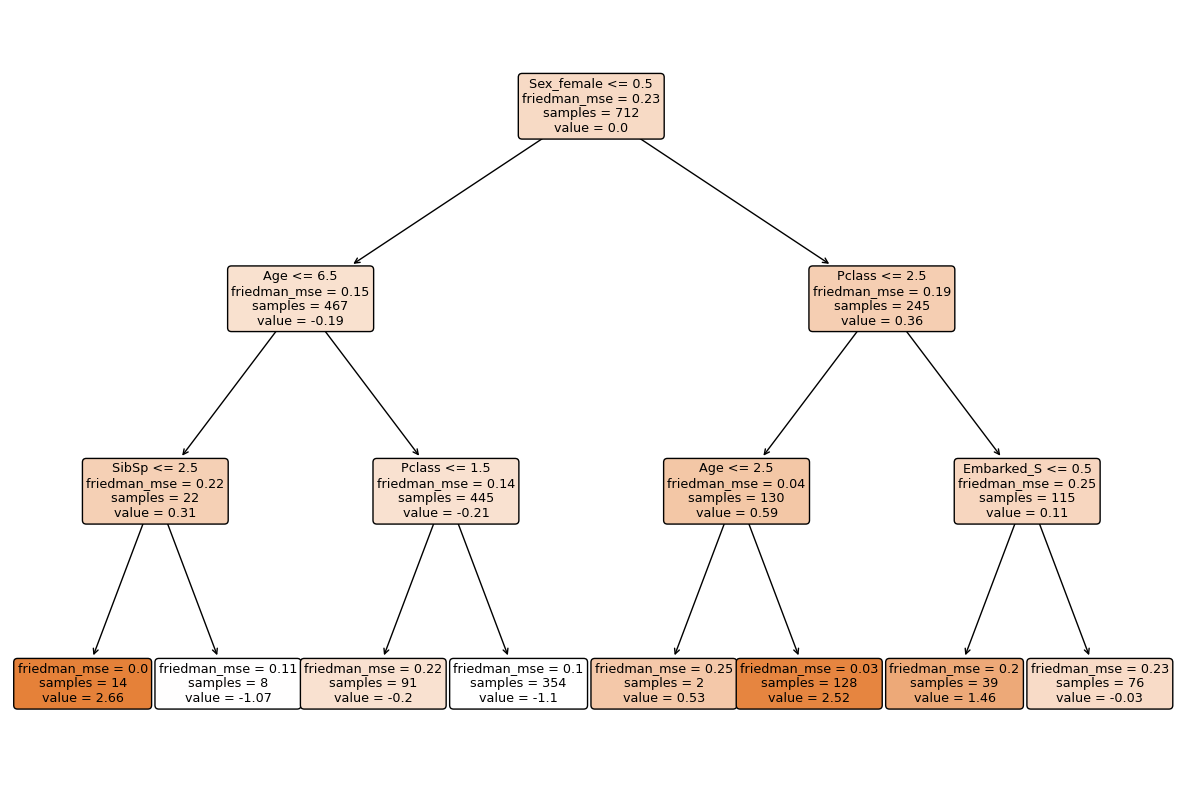

In [29]:
# Boosted tree model
boosted_tree = GradientBoostingClassifier(random_state=42)
boosted_tree.fit(X_train_full, y_train_full)

# Extract the first base learner from the first boosting
# iteration in a boosted ensemble.
base_tree = boosted_tree.estimators_[0, 0]

fig = plt.figure(figsize=(15,10))
plot_tree(base_tree, feature_names=list(X.columns), rounded = True, proportion = False, precision = 2, filled = True)
plt.show

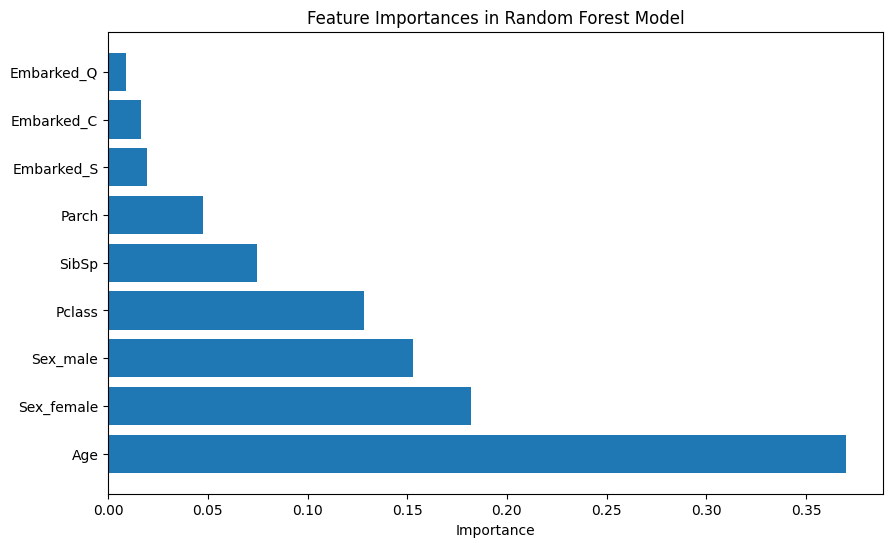

In [31]:
# Get feature importances
feature_importances = random_forest.feature_importances_

# Get feature names
feature_names = X_train_full.columns

# Create a DataFrame to better visualise feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [45]:
# Define the parameter grid
parameter_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20, 30]  # None means unlimited depth
}

# Use GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(random_forest, parameter_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_full, y_train_full)

best_parameters = grid_search.best_params_

# Print the best parameters
print("Best Parameters:\n", best_parameters)

Best Parameters:
 {'max_depth': 10, 'n_estimators': 50}


# Model accuracy

The Boosted Tree model has the highest accuracy of 0.8436. Therefore, the Boosted Tree model performed well and outperformed the other models.

In [46]:
# Model accuracy
# Make predictions
bagging_predictions = bagged_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
boosted_predictions = boosted_tree.predict(X_test)

# Calculate accuracy
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
boosted_accuracy = accuracy_score(y_test, boosted_predictions)

# Report results
print("Bagged Tree Accuracy:", bagging_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Boosted Tree Accuracy:", boosted_accuracy)


Bagged Tree Accuracy: 0.7988826815642458
Random Forest Accuracy: 0.8212290502793296
Boosted Tree Accuracy: 0.8435754189944135


In [44]:
# Define the parameter grid
parameter_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20, 30]  # None means unlimited depth
}

# Use GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(boosted_tree, parameter_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_test, y_test)

best_parameters = grid_search.best_params_

# Print the best parameters
print("Best Parameters:\n", best_parameters)

Best Parameters:
 {'max_depth': None, 'n_estimators': 50}
